# Part 01. Preprocessing & Feature Engineering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.6 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('/content/drive/MyDrive/week_hands_on_project5/bank_churn/dataset/BankChurners_.csv')
df.columns = df.columns.str.lower()
print(df.shape)
display(df.head())
display(df.info())

(10127, 21)


,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

None

#전처리

In [4]:
# attrition_flag
df['attrition_flag'].unique()

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
df['attrition_flag'] = df['attrition_flag'].map(attrition_mapping)


# clientnum
df['clientnum'].nunique()
df['clientnum'].duplicated().sum()
df = df.drop('clientnum', axis=1)

#분포 확인

In [5]:
df.describe()

,attrition_flag,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


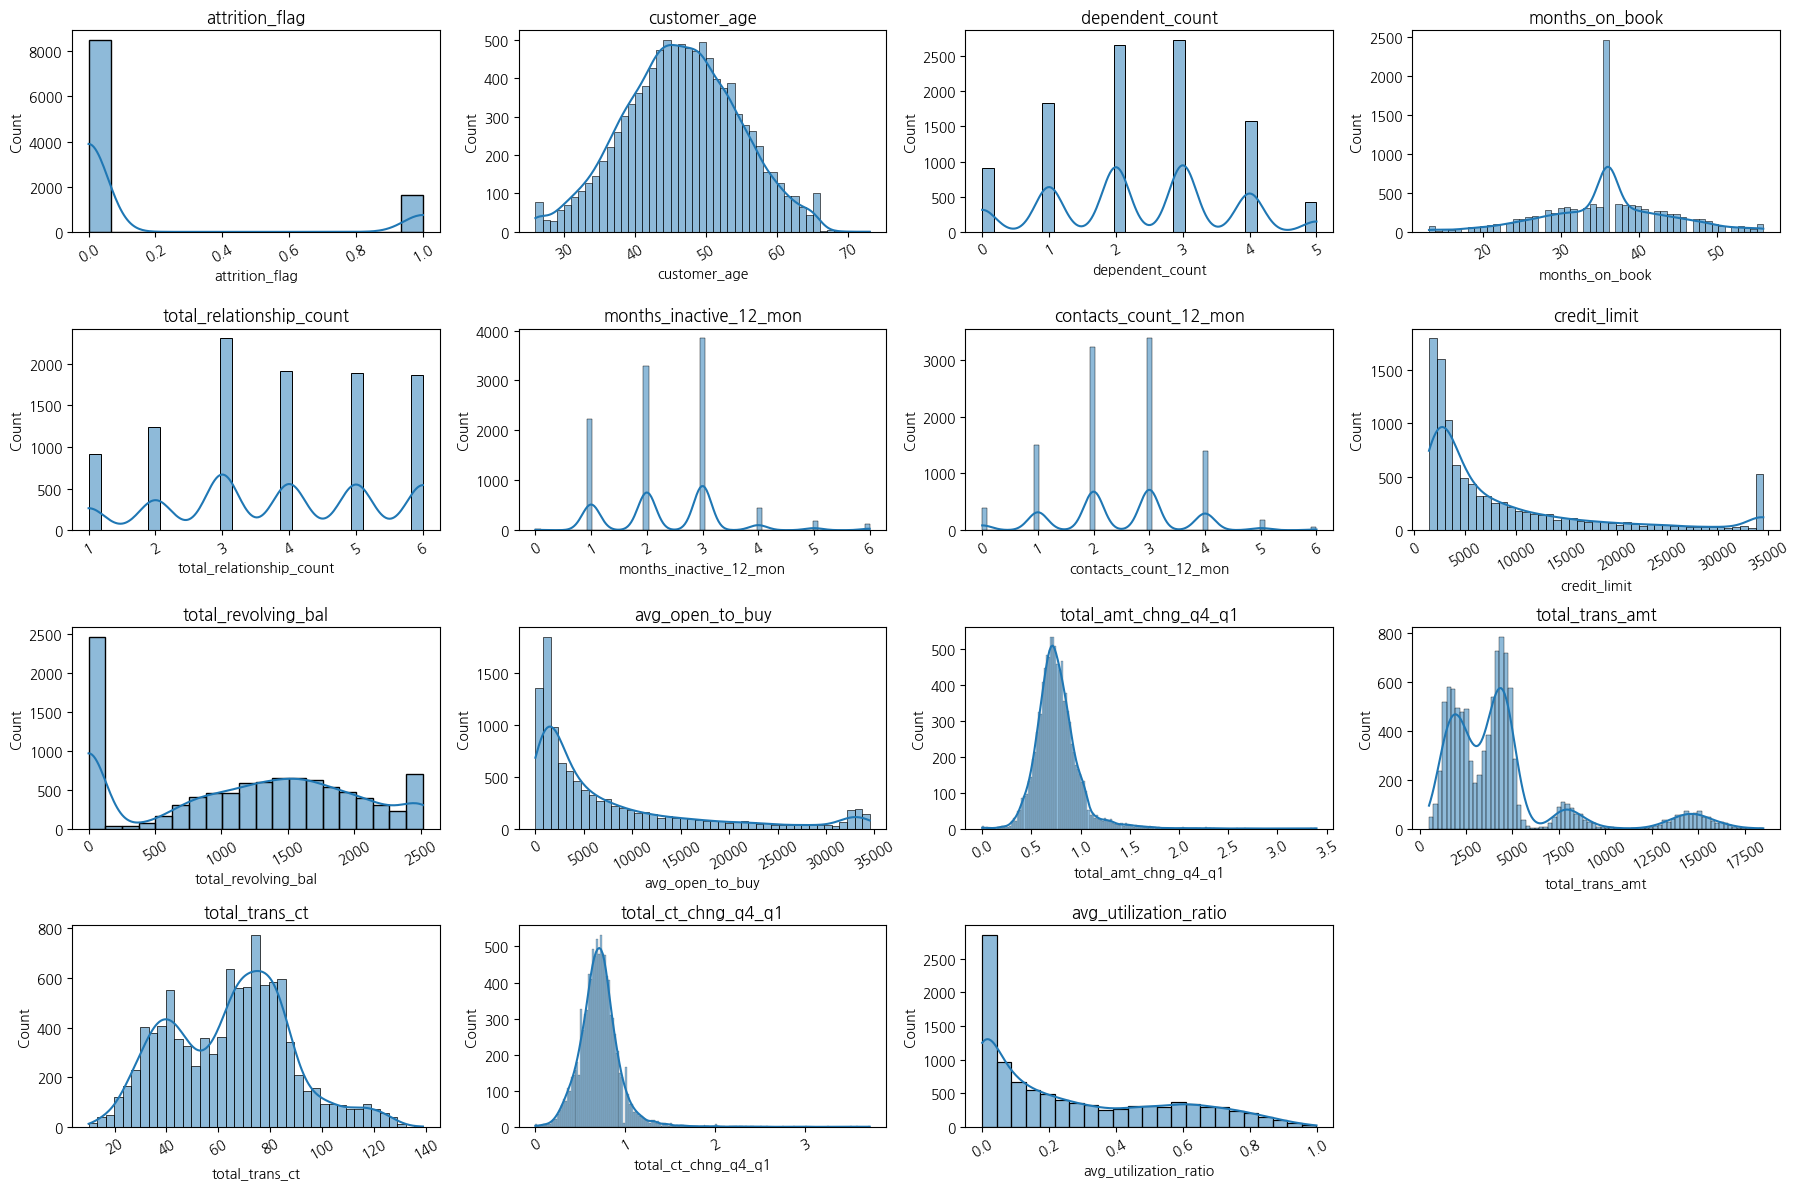

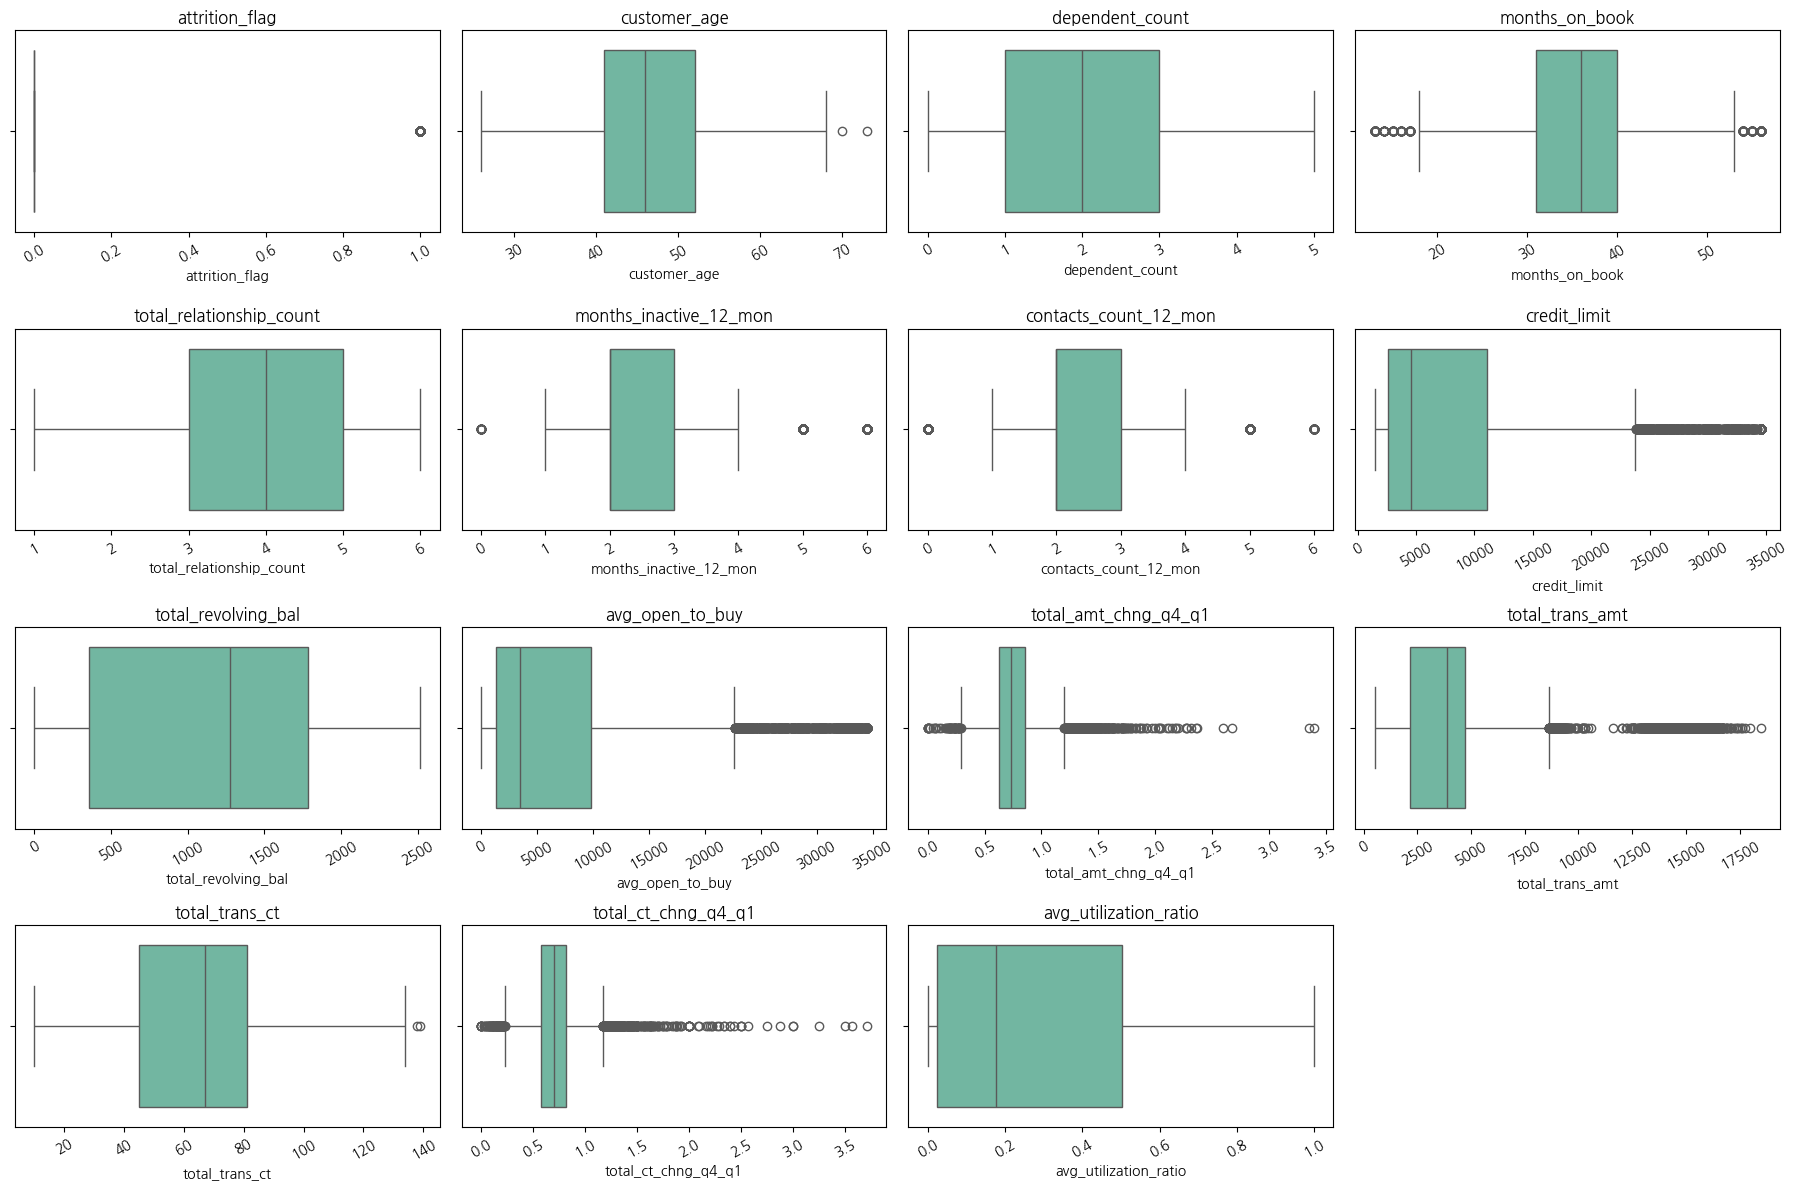

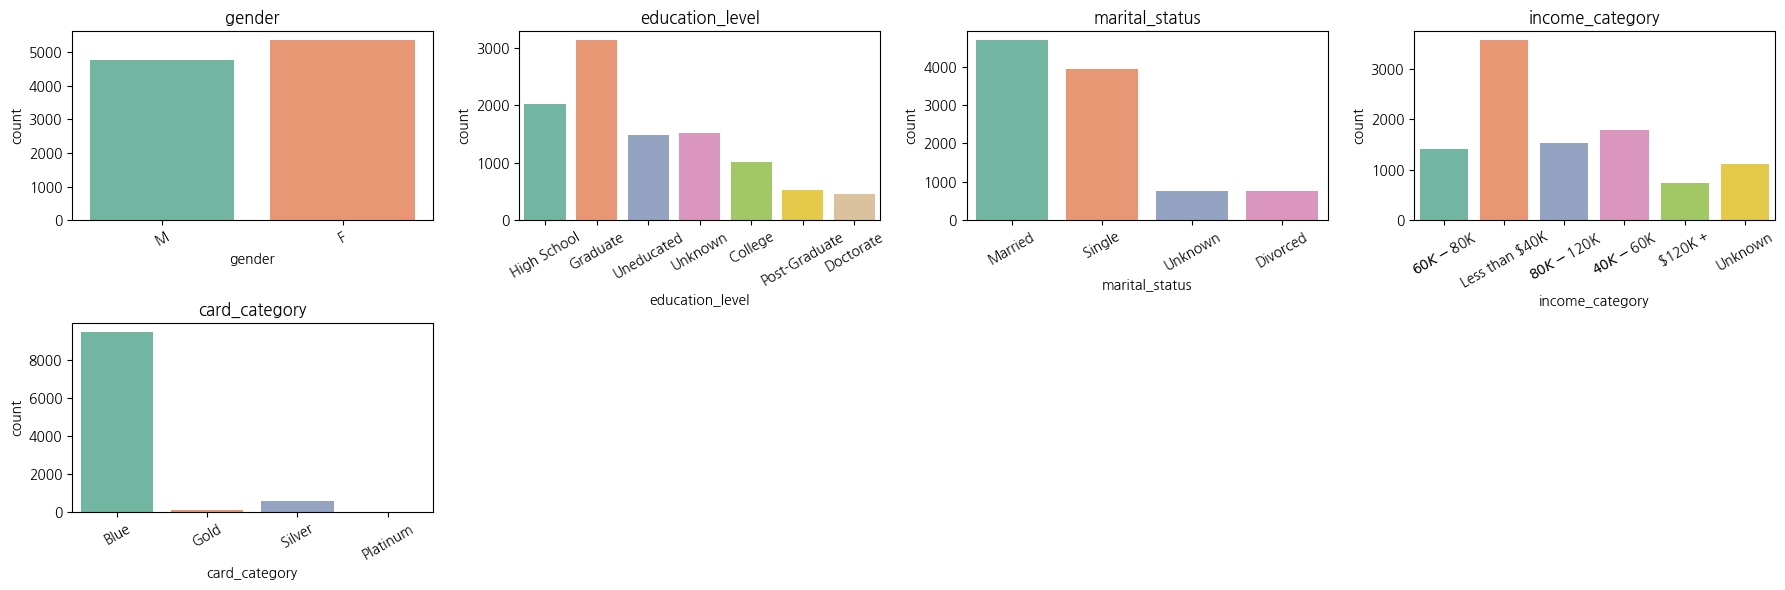

In [6]:
# 수치형 변수 <> 범주형 변수 구분
num_cols = []
cat_cols = []
for col in df.columns:
  if df[col].dtype == 'object':
    cat_cols.append(col)
  else:
    num_cols.append(col)


import math
# statistic visulization
def subplot_viz(columns,df, plot_type='hist'):
    rows = math.ceil(len(columns)/4)
    cols = 4

    fig, axes = plt.subplots(rows, cols, figsize=(18, 3*rows))
    axes = axes.flatten()

    for idx, col in enumerate(columns):
        if plot_type == 'hist':
            sns.histplot(data=df, x=col, kde=True, ax=axes[idx])

        elif plot_type == 'count':
            sns.countplot(data=df, x=col, ax=axes[idx], palette='Set2')
        elif plot_type == 'box':
            sns.boxplot(data=df, x=col, ax=axes[idx], palette='Set2')

        axes[idx].set_title(col)
        axes[idx].tick_params(axis='x', rotation=30)

    for empty in range(idx+1, len(axes)):
        fig.delaxes(axes[empty])

    plt.tight_layout()
    plt.show()

subplot_viz(num_cols, plot_type='hist', df=df)
subplot_viz(num_cols, plot_type='box',df=df)
subplot_viz(cat_cols, plot_type='count',df=df)

# 파생변수 생성

## Numerical variable

In [7]:
df['flag_high_credit_limit'] = np.where(df['credit_limit'] > df['credit_limit'].quantile(0.9),1,0) # 상위 10 퍼센트

df['flag_new_customer'] = np.where(df['months_on_book'] < 20,1,0)
df['flag_high_inactive'] = np.where(df['months_inactive_12_mon'] >= 4,1,0)
df['flag_high_active'] = np.where(df['months_inactive_12_mon'] == 0,1,0)

# 현재 데이터 분포 기준
df['flag_high_contact'] = np.where(df['contacts_count_12_mon'] >= 5,1,0)
df['flag_no_contact'] = np.where(df['contacts_count_12_mon'] == 0,1,0)
# 도메인 정보 기준 1000 , 20,000
df['flag_low_open_to_buy'] = np.where(df['avg_open_to_buy'] < 1000, 1, 0)
df['flag_high_open_to_buy'] = np.where(df['avg_open_to_buy'] > 20000, 1, 0)

# 30% 이상 감소 0.7 / 50% 이상 증가 급증 /
df['flag_amt_drop'] = np.where(df['total_amt_chng_q4_q1'] < 0.7, 1, 0)
df['flag_amt_spike'] = np.where(df['total_amt_chng_q4_q1'] > 1.5, 1, 0)
df['flag_no_chng'] = np.where(df['total_amt_chng_q4_q1'] == 0, 1, 0)

# 유저 그룹 이상치 기준 (이탈 그룹 중앙값 아래/ )
df['flag_low_spender'] = (df['total_trans_amt'] < 2500).astype(int)
df['flag_high_spender'] = (df['total_trans_amt'] > 10000).astype(int)

# 활동 횟수
df['flag_low_trans'] = np.where(df['total_trans_ct'] < df['total_trans_ct'].quantile(0.25),1,0)
df['flag_high_trans'] = np.where(df['total_trans_ct'] > df['total_trans_ct'].quantile(0.93),1,0)

# 40 % 이상 감소/ 50% 이상 증가 / 아예 사용 안함
df['flag_ct_drop'] = np.where(df['total_ct_chng_q4_q1'] < 0.6, 1, 0)
df['flag_ct_spike'] = np.where(df['total_ct_chng_q4_q1'] > 1.5, 1, 0)
df['flag_ct_zero'] = np.where(df['total_ct_chng_q4_q1'] == 0, 1, 0)

# 이탈고객 비교 결과, 이탈 고객 한도 사용률 매우 낮다 (거의 사용 안함)/ 유지 고객은 다양한 사용 패턴/
#  0.1 비활성 사용자 , 0.9 이상 고위험 사용자
df['flag_low_util'] = np.where(df['avg_utilization_ratio'] < 0.1, 1, 0)
df['flag_high_util'] = np.where(df['avg_utilization_ratio'] > 0.9, 1, 0)

In [8]:
# # 금전적 위기 파악하기 위한 주요 파생 변수

# # 평균 거래 금액이 큰지 ?
# #### total_trans_ct 0인 데이터 nan 처리 필요
# df['_avg_amt_per_trans'] = df['total_trans_amt'] / df['total_trans_ct']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['util_z', 'trans_ct_z', 'amt_z']] = scaler.fit_transform(
    df[['avg_utilization_ratio', 'total_trans_ct', 'total_trans_amt']]
)

# 위험 점수 = 한도 많이 쓰고, 거래 적고, 금액도 적은 사람
df['_risk_score'] = df['util_z'] - df['trans_ct_z'] - df['amt_z']

In [9]:
# 최근 1년간 월평균 접촉 비율
df['_monthly_contact_rate'] = df['contacts_count_12_mon'] / 12
# 최근 1년간 비활성 비율
df['_inactive_ratio_12m'] = df['months_inactive_12_mon'] / 12

# 기간 대비 은행과의 관계 강도
df['_relationship_intensity'] = df['total_relationship_count'] / df['months_on_book']

# 부양가족 대비 나이
df['_age_to_dependents'] = df['customer_age'] / (df['dependent_count'] + 1)

# 월 평균 지표
df['_avg_monthly_txn_ct'] = df['total_trans_ct'] / df['months_on_book']

In [10]:
import math
# statistic visulization
def subplot_viz(columns,df, plot_type='hist'):
    rows = math.ceil(len(columns)/4)
    cols = 4

    fig, axes = plt.subplots(rows, cols, figsize=(18, 3*rows))
    axes = axes.flatten()

    for idx, col in enumerate(columns):
        if plot_type == 'hist':
            sns.histplot(data=df, x=col, kde=True, ax=axes[idx])

        elif plot_type == 'count':
            sns.countplot(data=df, x=col, ax=axes[idx], palette='Set2')
        elif plot_type == 'box':
            sns.boxplot(data=df, x=col, ax=axes[idx], palette='Set2')

        axes[idx].set_title(col)
        axes[idx].tick_params(axis='x', rotation=30)

    for empty in range(idx+1, len(axes)):
        fig.delaxes(axes[empty])

    plt.tight_layout()
    plt.show()

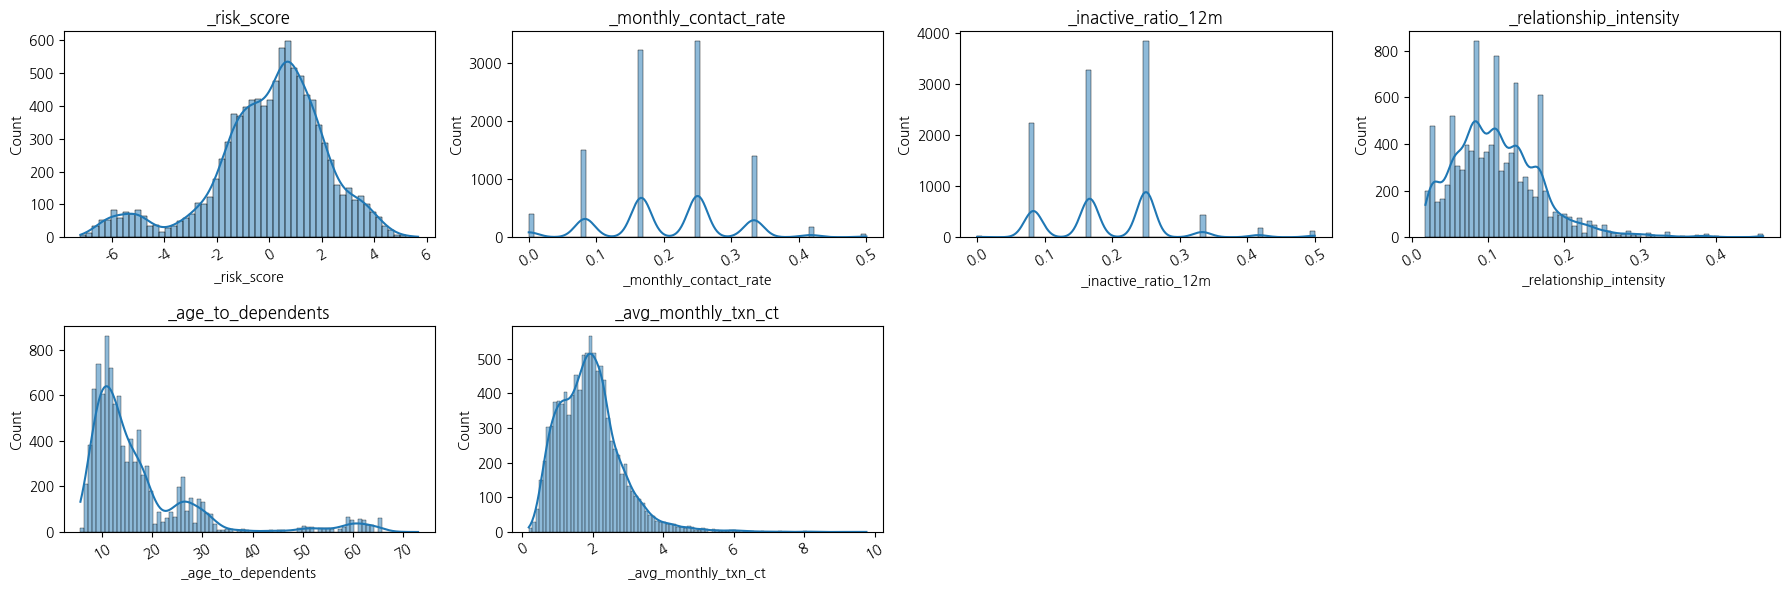

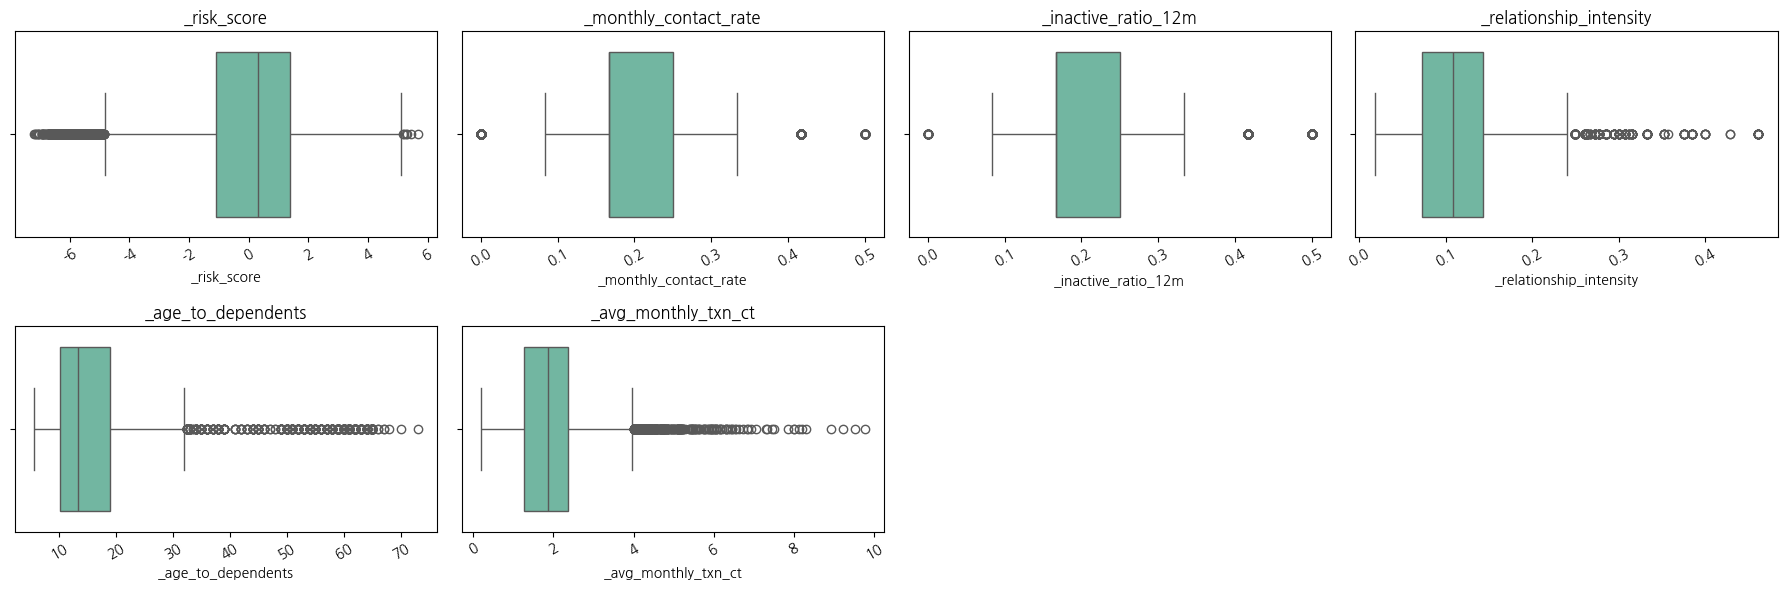

In [11]:
derived_col = []
for col in df.columns:
  if col.strip().startswith('_'):
    derived_col.append(col)

subplot_viz(derived_col, plot_type='hist', df=df)
subplot_viz(derived_col, plot_type='box',df=df)

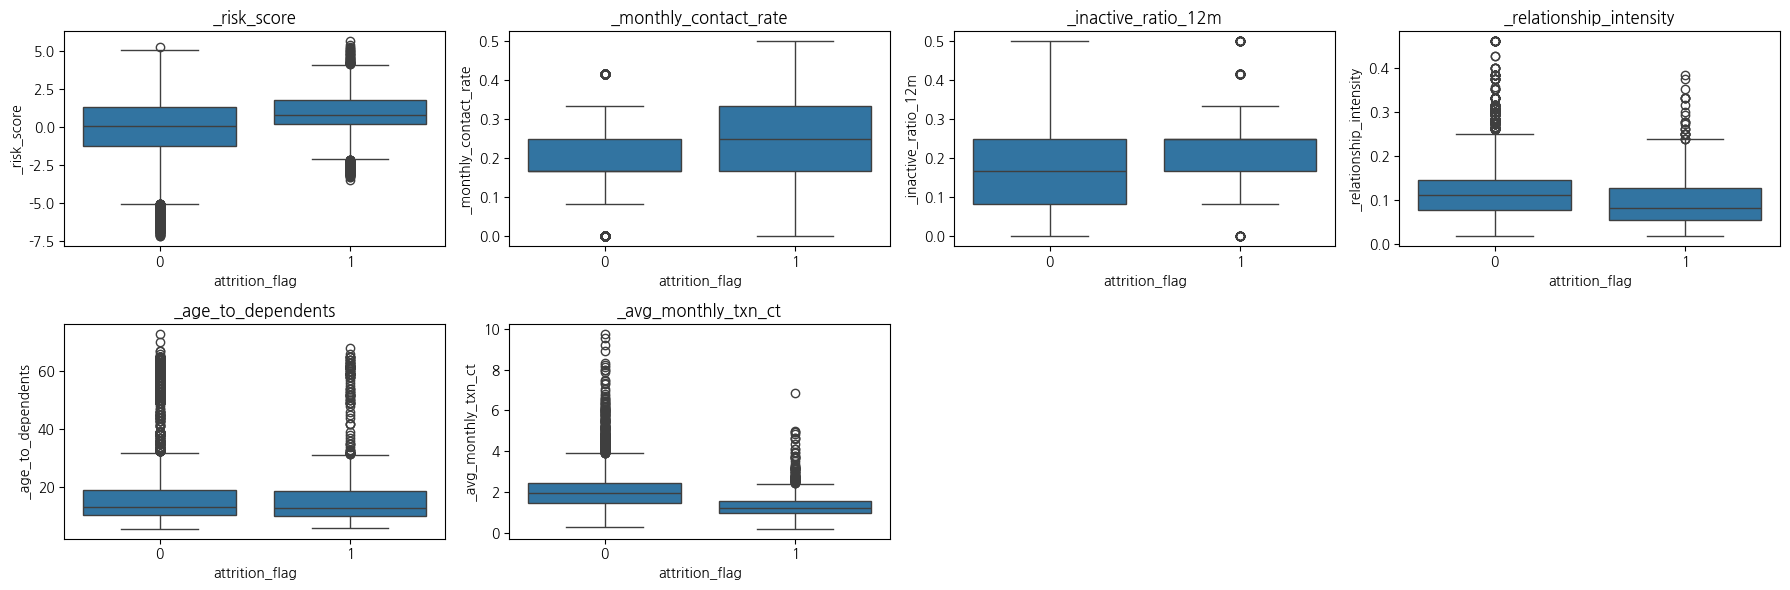

In [12]:
# 생성한 파생변수 시각적 유효성 판단
def varif_derived_var(columns,dataframe):
  rows = math.ceil(len(columns)/4)
  cols = 4
  fig, axes = plt.subplots(rows, cols, figsize=(18, 3*rows))
  axes = axes.flatten()

  for idx, der_col in enumerate(columns):
    sns.boxplot(x='attrition_flag', y=der_col, data=df, ax=axes[idx])

    axes[idx].set_title(der_col)

  for empty in range(idx+1, len(axes)):
    fig.delaxes(axes[empty])

  plt.tight_layout()
  plt.show()
varif_derived_var(derived_col,df)


- _risk_score
- _monthly_contact_rate
- _inactive_ratio_12m
- _avg_monthly_txn_ct

- _relationship_intensity

- _age_to_depentdents ❌

In [13]:
# 파생변수 유의미 차이 검정
from scipy.stats import ttest_ind

derived_cols_fortest = ['_risk_score',
       '_monthly_contact_rate', '_inactive_ratio_12m', '_avg_monthly_txn_ct','_relationship_intensity','_age_to_dependents']
dict_ttest_derv = {}
for col in derived_cols_fortest:

  group0 = df[df['attrition_flag'] == 0][col]
  group1 = df[df['attrition_flag'] == 1][col]

  t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
  dict_ttest_derv[col] = {'T-statistic': round(t_stat, 3), 'p-value': round(p_val, 4)}

pd.DataFrame(dict_ttest_derv).T.sort_values(by='p-value')

,T-statistic,p-value
_risk_score,-20.749,0.0000
_monthly_contact_rate,-20.901,0.0000
_inactive_ratio_12m,-16.862,0.0000
_avg_monthly_txn_ct,38.906,0.0000
_relationship_intensity,13.693,0.0000
_age_to_dependents,1.005,0.3151


In [14]:
df.groupby('attrition_flag')[derived_cols_fortest].mean().T

attrition_flag,0,1
_risk_score,-0.158198,0.826481
_monthly_contact_rate,0.196363,0.247695
_inactive_ratio_12m,0.189480,0.224442
_avg_monthly_txn_ct,2.037721,1.324407
_relationship_intensity,0.116302,0.095919
_age_to_dependents,17.534241,17.213768


In [15]:
df.drop('_age_to_dependents', axis=1,inplace=True)

    ✅ 파생 변수 _risk_score, _monthly_contact_rate, _inactive_ratio_12m, _avg_monthly_txn_ct는
    모두 이탈 여부에 대해 통계적으로 유의한 차이를 보였으며
    p-value < 0.001 수준에서 귀무가설이 기각되었습니다.
    특히 _avg_monthly_txn_ct의 T-statistic은 37.58로 매우 크며,
    이는 이탈 고객과 잔존 고객 간의 거래 빈도 차이가 매우 뚜렷함을 의미합니다.

## Nominal variable

In [16]:
for col in cat_cols:
  display(f'{df[col].value_counts()}\n')

'gender\nF    5358\nM    4769\nName: count, dtype: int64\n'

'education_level\nGraduate         3128\nHigh School      2013\nUnknown          1519\nUneducated       1487\nCollege          1013\nPost-Graduate     516\nDoctorate         451\nName: count, dtype: int64\n'

'marital_status\nMarried     4687\nSingle      3943\nUnknown      749\nDivorced     748\nName: count, dtype: int64\n'

'income_category\nLess than $40K    3561\n$40K - $60K       1790\n$80K - $120K      1535\n$60K - $80K       1402\nUnknown           1112\n$120K +            727\nName: count, dtype: int64\n'

'card_category\nBlue        9436\nSilver       555\nGold         116\nPlatinum      20\nName: count, dtype: int64\n'

In [17]:
# categorical values

from scipy.stats import chi2_contingency

result_chi = []
target_col = 'attrition_flag'

for col in cat_cols:
  contingency_table = pd.crosstab(df[col], df[target_col])
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  result_chi.append({
      'feature':col,
      'chi2':chi2,
      'p-value':round(p,10)
  })

chi_df = pd.DataFrame(result_chi)
chi_df.sort_values(by='p-value')

,feature,chi2,p-value
0,gender,13.865614,0.000196
3,income_category,12.832259,0.025002
1,education_level,12.511205,0.051489
2,marital_status,6.056097,0.108913
4,card_category,2.234227,0.525238


1. 순서형 변수로 인코딩할 변수들 : income_category, education_level
2. card_category 의 경우 데이터 정보 부족으로 등급 체계인지 종류 차이인지 확인 불가 + <br> p-value에서 연관성이 약한 상태이므로 범주형으로 취급하기로 함.

In [18]:
# 순서형 변수 2 가지
# 1. education_level
edu_order_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': np.nan
}
df['education_level_encoded'] = df['education_level'].map(edu_order_mapping)
df['is_edu_unknown'] = df['education_level'] == 'Unknown'
# 2. income_category
income_order = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': np.nan
}

df['income_category_encoded'] = df['income_category'].map(income_order)
df['is_income_unknown'] = df['income_category'] == 'Unknown'

In [19]:
# 범주형 변수 3 가지
# 1. gender 는 모델 학습에서 제외

# 2. arital_status
df['is_married'] = df['marital_status'] == 'Married'
df['is_single'] = df['marital_status'] == 'Single'
df['is_divorced'] = df['marital_status'] == 'Divorced'
df['is_marital_unknown'] = df['marital_status'] == 'Unknown'

# 3.card_category
card_dummies = pd.get_dummies(df['card_category'], prefix='card', drop_first=True)
df = pd.concat([df, card_dummies], axis=1)

# 데이터 저장

In [20]:
print(df.shape)
display(df.head())
display(df.info())

(10127, 59)


,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,flag_high_credit_limit,flag_new_customer,flag_high_inactive,flag_high_active,flag_high_contact,flag_no_contact,flag_low_open_to_buy,flag_high_open_to_buy,flag_amt_drop,flag_amt_spike,flag_no_chng,flag_low_spender,flag_high_spender,flag_low_trans,flag_high_trans,flag_ct_drop,flag_ct_spike,flag_ct_zero,flag_low_util,flag_high_util,util_z,trans_ct_z,amt_z,_risk_score,_monthly_contact_rate,_inactive_ratio_12m,_relationship_intensity,_avg_monthly_txn_ct,education_level_encoded,is_edu_unknown,income_category_encoded,is_income_unknown,is_married,is_single,is_divorced,is_marital_unknown,card_Gold,card_Platinum,card_Silver
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,-0.775882,-0.973895,-0.959707,1.157720,0.250000,0.083333,0.128205,1.076923,1.0,False,2.0,False,True,False,False,False,False,False,False
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,-0.616276,-1.357340,-0.916433,1.657497,0.166667,0.083333,0.136364,0.750000,3.0,False,0.0,False,False,True,False,False,False,False,False
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.997155,-1.911206,-0.740982,1.655032,0.000000,0.083333,0.111111,0.555556,3.0,False,3.0,False,True,False,False,False,False,False,False
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1.759686,-1.911206,-0.951758,4.622650,0.083333,0.333333,0.088235,0.588235,1.0,False,0.0,False,False,False,False,True,False,False,False
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.997155,-1.570365,-1.056263,1.629474,0.000000,0.083333,0.238095,1.333333,0.0,False,2.0,False,True,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  int64  
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

None

In [21]:
df.to_csv('/content/drive/MyDrive/week_hands_on_project5/bank_churn/dataset/bankchurn_processed.csv',index=False)